In [2]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from categorical_embedder import CategoricalEmbedder, umap_plot_cat_emb
import numpy as np
import matplotlib.pyplot as plt


adult = fetch_openml(name='adult',version=2)


In [3]:
features = adult['data']

categorical_features = features.select_dtypes(include=["object",'category']).columns.to_list()
numeric_features = features.select_dtypes(include=np.float64).columns.to_list()

target = adult['target'].apply(lambda x: 0 if x=="<=50K" else 1)

c:\Users\vitos\anaconda3\envs\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


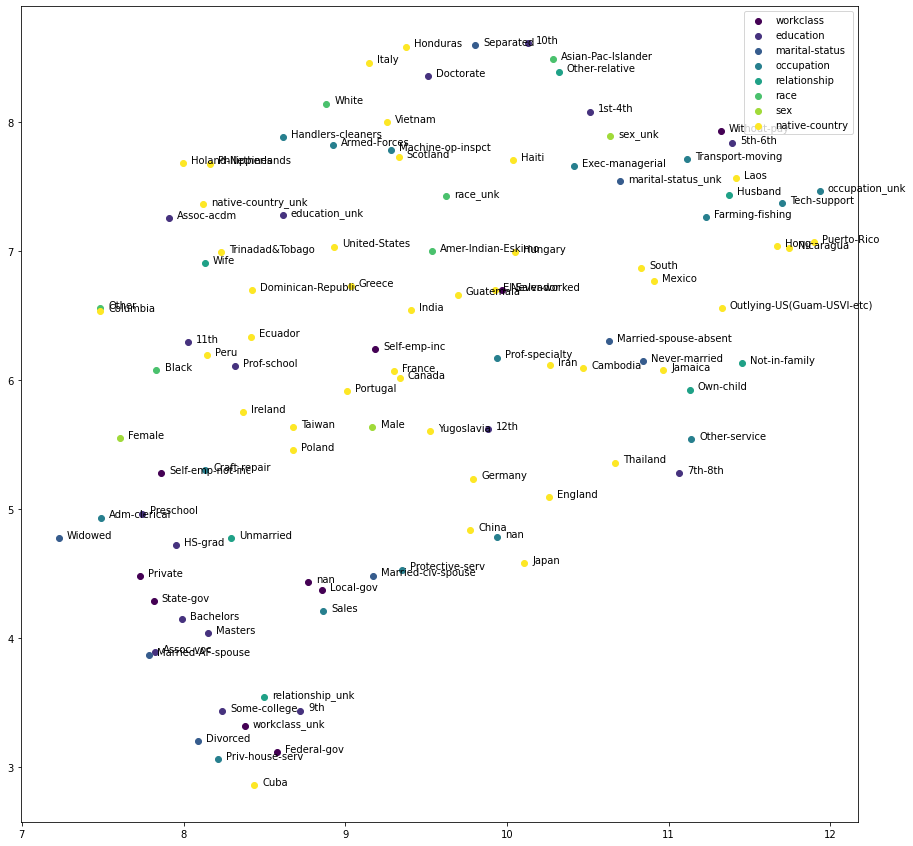

In [8]:
X = features.copy()
y = target.copy()

ce = CategoricalEmbedder(emb_size=32, random_state=123)

ce.fit(X.loc[:,categorical_features],y)

umap_plot_cat_emb(ce, n_neighbors=8)

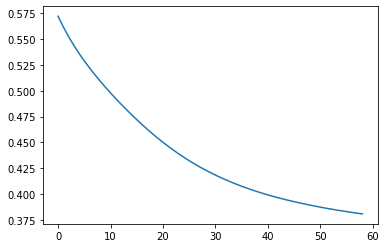

In [9]:
plt.plot(ce.mlp_.loss_curve_)

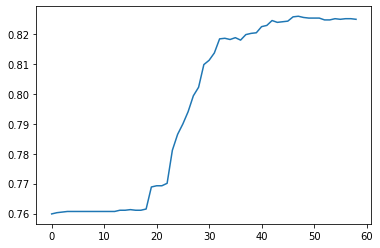

In [10]:
plt.plot(ce.mlp_.validation_scores_)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
categorical_features = X.select_dtypes(include=["object",'category']).columns.to_list()
numerical_features = X.select_dtypes(include=np.float64).columns.to_list()

n_max_one_hot = 5
oh_feat=[]
emb_feat=[]

for feature in categorical_features:
    if X_train[feature].nunique()>n_max_one_hot:
        emb_feat.append(feature)
    else:
        oh_feat.append(feature)     

In [12]:


emb_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    CategoricalEmbedder(emb_size=2)
)
emb_pipe.fit(X_train.loc[:,emb_feat],y_train)
X_emb_train = emb_pipe.transform(X_train.loc[:,emb_feat])
X_emb_test = emb_pipe.transform(X_test.loc[:,emb_feat])


oh_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)
oh_pipe.fit(X_train.loc[:,oh_feat],y_train)
X_oh_train = oh_pipe.transform(X_train.loc[:,oh_feat])
X_oh_test = oh_pipe.transform(X_test.loc[:,oh_feat])


X_full_train = np.concatenate([X_train[numerical_features].values, X_emb_train ,X_oh_train], axis=1)
X_full_test = np.concatenate([X_test[numerical_features].values, X_emb_test, X_oh_test], axis=1)


clf = RandomForestClassifier(random_state=123)

clf.fit(X_full_train, y_train)

y_pred = clf.predict(X_full_test)

print(classification_report(y_test, y_pred))

c:\Users\vitos\anaconda3\envs\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9344
           1       0.73      0.65      0.69      2867

    accuracy                           0.86     12211
   macro avg       0.81      0.79      0.80     12211
weighted avg       0.86      0.86      0.86     12211



In [13]:
oe_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
)

oe_pipe.fit(X_train.loc[:,emb_feat],y_train)
X_emb_train = oe_pipe.transform(X_train.loc[:,emb_feat])
X_emb_test = oe_pipe.transform(X_test.loc[:,emb_feat])


oh_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)
oh_pipe.fit(X_train.loc[:,oh_feat],y_train)
X_oh_train = oh_pipe.transform(X_train.loc[:,oh_feat])
X_oh_test = oh_pipe.transform(X_test.loc[:,oh_feat])


X_full_train = np.concatenate([X_train[numerical_features].values,X_emb_train,X_oh_train], axis=1)
X_full_test = np.concatenate([X_test[numerical_features].values,X_emb_test,X_oh_test], axis=1)


clf = RandomForestClassifier(random_state=123)

clf.fit(X_full_train, y_train)

y_pred = clf.predict(X_full_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9344
           1       0.74      0.64      0.69      2867

    accuracy                           0.86     12211
   macro avg       0.82      0.79      0.80     12211
weighted avg       0.86      0.86      0.86     12211

